# Overview

### Objective
* To use supervised learning to build a prediction model to determine the number of all stars awards that a NBA players supposed to have based on their their existing advance stats and the tier ranking that we predicted previously from the nba_adv_tiers data set

### Dataset Source
* nba_adv_tiers: Advance stats + tier ranking

### Dataset Column Descriptions:
* https://basketball.realgm.com/info/glossary



**Import Packages**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

**Reading CSV File**

In [2]:
df = pd.read_csv('nba_adv_tiers.csv')

In [3]:
df.head(10)

,Player,TS%,eFG%,Total S %,ORB%,DRB%,TRB%,AST%,TOV%,STL%,...,PPS,ORtg,DRtg,eDiff,FIC,PER,GP,MPG,All Stars,Group
0,A.J. Price,0.4775,0.4475,148.25,2.05,8.90,5.35,22.90,13.10,1.85,...,1.05,100.80,107.90,-6.85,206.00,11.90,44.0,12.90,0,1
1,Aaron Brooks,0.5180,0.4840,159.50,2.00,6.60,4.60,24.20,14.90,1.40,...,1.10,103.20,111.60,-7.70,318.30,12.40,69.0,21.60,0,1
2,Aaron Gordon,0.5340,0.5035,145.55,5.75,18.00,11.80,11.65,11.35,1.25,...,1.20,107.55,109.35,-3.00,730.75,15.10,75.0,31.70,0,1
3,Aaron Gray,0.5440,0.5330,105.60,12.10,27.00,20.20,5.40,21.90,1.10,...,1.30,100.80,107.50,-3.70,144.00,11.10,49.0,16.60,0,2
4,Aaron Holiday,0.5195,0.4870,161.75,1.45,9.65,5.50,18.95,12.55,1.70,...,1.10,103.30,111.70,-6.15,282.95,11.65,66.0,17.80,0,1
5,Aaron Nesmith,0.5400,0.5160,153.35,3.75,14.80,9.40,4.95,12.30,1.40,...,1.15,103.95,109.95,-6.00,129.05,8.25,46.0,14.50,0,3
6,Abdel Nader,0.5220,0.4980,149.30,2.00,12.10,7.50,6.50,12.80,1.30,...,1.10,101.70,108.50,-6.80,148.80,8.80,55.0,11.40,0,3
7,Al Harrington,0.5310,0.5030,150.80,4.65,16.95,10.95,8.55,12.15,1.40,...,1.15,102.05,108.00,-6.05,478.10,13.85,72.0,27.50,0,1
8,Al Horford,0.5740,0.5470,164.50,6.50,20.30,13.10,17.40,11.20,1.30,...,1.20,115.10,103.90,12.00,983.60,19.40,73.0,31.85,5,4
9,Al Jefferson,0.5230,0.4955,132.30,7.15,24.70,16.25,11.35,6.45,1.25,...,1.10,107.20,104.15,3.30,960.70,19.85,73.0,33.10,0,4


**Dataset Dimension**

In [4]:
df.shape

(866, 23)

**Dataset Info**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     866 non-null    object 
 1   TS%        866 non-null    float64
 2   eFG%       866 non-null    float64
 3   Total S %  866 non-null    float64
 4   ORB%       866 non-null    float64
 5   DRB%       866 non-null    float64
 6   TRB%       866 non-null    float64
 7   AST%       866 non-null    float64
 8   TOV%       866 non-null    float64
 9   STL%       866 non-null    float64
 10  BLK%       866 non-null    float64
 11  USG%       866 non-null    float64
 12  PPR        866 non-null    float64
 13  PPS        866 non-null    float64
 14  ORtg       866 non-null    float64
 15  DRtg       866 non-null    float64
 16  eDiff      866 non-null    float64
 17  FIC        866 non-null    float64
 18  PER        866 non-null    float64
 19  GP         866 non-null    float64
 20  MPG       

**Reading Dataset Column names.**

In [6]:
column_names = df.columns.values

In [7]:
column_names

array(['Player', 'TS%', 'eFG%', 'Total S %', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'TOV%', 'STL%', 'BLK%', 'USG%', 'PPR', 'PPS', 'ORtg',
       'DRtg', 'eDiff', 'FIC', 'PER', 'GP', 'MPG', 'All Stars', 'Group'],
      dtype=object)

**Checking nan values**

In [8]:
df.isnull().sum()

Player       0
TS%          0
eFG%         0
Total S %    0
ORB%         0
DRB%         0
TRB%         0
AST%         0
TOV%         0
STL%         0
BLK%         0
USG%         0
PPR          0
PPS          0
ORtg         0
DRtg         0
eDiff        0
FIC          0
PER          0
GP           0
MPG          0
All Stars    0
Group        0
dtype: int64

**Creating Train & Test Dataset**

In [9]:
# Dropping Player column since it's not necessary
X = df.drop(['Player'], axis=1)
# Choose All Stars for supervise learningg
y = df['All Stars']

In [10]:
from sklearn.model_selection import train_test_split
# Split dataset into 70% for test and 30% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

**Shape of Train & Test Dataset**

In [11]:
X_train.shape, X_test.shape

((606, 22), (260, 22))

In [12]:
X_train.dtypes

TS%          float64
eFG%         float64
Total S %    float64
ORB%         float64
DRB%         float64
TRB%         float64
AST%         float64
TOV%         float64
STL%         float64
BLK%         float64
USG%         float64
PPR          float64
PPS          float64
ORtg         float64
DRtg         float64
eDiff        float64
FIC          float64
PER          float64
GP           float64
MPG          float64
All Stars      int64
Group          int64
dtype: object

In [13]:
X_train.head()

,TS%,eFG%,Total S %,ORB%,DRB%,TRB%,AST%,TOV%,STL%,BLK%,...,PPS,ORtg,DRtg,eDiff,FIC,PER,GP,MPG,All Stars,Group
28,0.542,0.5140,119.40,11.20,24.70,17.70,9.40,13.1,1.70,1.80,...,1.2,113.60,103.30,10.20,366.40,16.90,65.0,27.70,0,2
761,0.511,0.4855,153.15,7.10,21.50,14.00,14.50,13.9,0.90,3.20,...,1.1,103.05,104.20,-1.55,451.80,14.55,73.0,24.90,0,2
193,0.539,0.5165,141.70,3.85,13.65,8.75,13.55,18.4,2.55,1.85,...,1.2,100.95,111.45,-10.35,284.45,11.00,66.5,21.35,0,3
281,0.552,0.5070,165.20,1.80,11.30,6.30,26.70,11.2,2.20,1.00,...,1.2,113.90,110.00,4.20,741.80,16.30,64.0,35.70,1,5
814,0.501,0.4760,154.60,1.90,11.20,6.50,10.60,10.2,1.70,0.80,...,1.1,97.40,114.70,-17.30,315.80,10.20,60.0,22.80,0,1


**Count All Stars Class**

In [14]:
df['All Stars'].value_counts()

0     745
1      37
2      19
3      13
6       9
4       8
5       8
7       6
8       5
10      5
15      3
12      2
18      2
9       1
11      1
13      1
14      1
Name: All Stars, dtype: int64

# **Building Decision Tree model**

In [15]:
from sklearn.tree import DecisionTreeClassifier

### Why choose max depth at 5?
Max depth at 5 is the point where both training set and test set has the highest accuracy. The technique we use is the same as choosing the k. Start the depth from 1 and keep increasing till we find the highest accuracy without over fitting the model


In [16]:
classifier_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
classifier_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

**Predict Test Data using Trained model**

In [17]:
y_pred_gini = classifier_gini.predict(X_test)

**Checking Accuracy on Test Dataset**

In [18]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9500


**Checking Accuracy on Train Dataset**

In [19]:
y_pred_train_gini = classifier_gini.predict(X_train)

In [20]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9637


**Comparing Scores of Both Dataset**

In [21]:

print('Training set score: {:.4f}'.format(classifier_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(classifier_gini.score(X_test, y_test)))

Training set score: 0.9637
Test set score: 0.9500


**Plotting Decision Tree**

[Text(167.4, 398.64, 'X[20] <= 0.5\ngini = 0.241\nsamples = 606\nvalue = [527, 28, 11, 7, 4, 5, 6, 5, 4, 1, 1, 1, 1, 1\n2, 2]'),
 Text(83.7, 326.15999999999997, 'gini = 0.0\nsamples = 527\nvalue = [527, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0]'),
 Text(251.10000000000002, 326.15999999999997, 'X[20] <= 1.5\ngini = 0.826\nsamples = 79\nvalue = [0, 28, 11, 7, 4, 5, 6, 5, 4, 1, 1, 1, 1, 1\n2, 2]'),
 Text(167.4, 253.67999999999998, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0]'),
 Text(334.8, 253.67999999999998, 'X[20] <= 2.5\ngini = 0.884\nsamples = 51\nvalue = [0, 0, 11, 7, 4, 5, 6, 5, 4, 1, 1, 1, 1, 1\n2, 2]'),
 Text(251.10000000000002, 181.2, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0]'),
 Text(418.5, 181.2, 'X[20] <= 3.5\ngini = 0.888\nsamples = 40\nvalue = [0, 0, 0, 7, 4, 5, 6, 5, 4, 1, 1, 1, 1, 1\n2, 2]'),
 Text(334.8, 108.71999999999997, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 0, 7, 0, 0, 0, 0, 0, 0

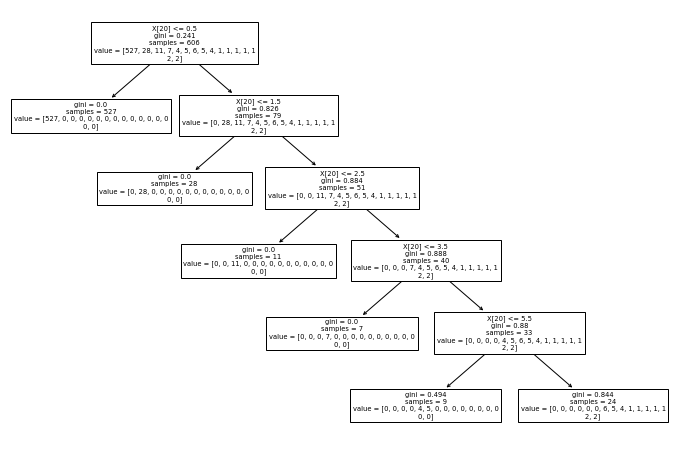

In [22]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(classifier_gini.fit(X_train, y_train)) 

## **K Nearest Neighbour**

**Import Pakages**

In [23]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing

**Getting Columns for Train Dataset**

In [24]:
X = df[['TS%', 'eFG%', 'Total S %', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'TOV%', 'STL%', 'BLK%', 'USG%', 'PPR', 'PPS', 'ORtg',
       'DRtg', 'eDiff', 'FIC', 'PER', 'GP', 'MPG', 'Group']].values

In [25]:
X[0:5]

array([[ 4.7750e-01,  4.4750e-01,  1.4825e+02,  2.0500e+00,  8.9000e+00,
         5.3500e+00,  2.2900e+01,  1.3100e+01,  1.8500e+00,  2.0000e-01,
         2.0300e+01,  3.5500e+00,  1.0500e+00,  1.0080e+02,  1.0790e+02,
        -6.8500e+00,  2.0600e+02,  1.1900e+01,  4.4000e+01,  1.2900e+01,
         1.0000e+00],
       [ 5.1800e-01,  4.8400e-01,  1.5950e+02,  2.0000e+00,  6.6000e+00,
         4.6000e+00,  2.4200e+01,  1.4900e+01,  1.4000e+00,  6.0000e-01,
         2.3100e+01,  1.9000e+00,  1.1000e+00,  1.0320e+02,  1.1160e+02,
        -7.7000e+00,  3.1830e+02,  1.2400e+01,  6.9000e+01,  2.1600e+01,
         1.0000e+00],
       [ 5.3400e-01,  5.0350e-01,  1.4555e+02,  5.7500e+00,  1.8000e+01,
         1.1800e+01,  1.1650e+01,  1.1350e+01,  1.2500e+00,  1.8500e+00,
         2.0350e+01,  6.5000e-01,  1.2000e+00,  1.0755e+02,  1.0935e+02,
        -3.0000e+00,  7.3075e+02,  1.5100e+01,  7.5000e+01,  3.1700e+01,
         1.0000e+00],
       [ 5.4400e-01,  5.3300e-01,  1.0560e+02,  1.2100e+01

**Getting Column for Test Dataset**

In [26]:
y = df['All Stars'].values
y[0:5]

array([0, 0, 0, 0, 0])

**Normalize Data**

In [27]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.45986151e+00, -1.33346878e+00, -3.09039308e-02,
        -8.12204233e-01, -1.09795358e+00, -1.06721516e+00,
         1.21941061e+00,  9.12631433e-02,  6.02968543e-01,
        -1.03231766e+00,  4.02069089e-01,  1.20840263e+00,
        -1.22751375e+00, -9.21527577e-01, -3.23426807e-01,
        -6.45319592e-01, -9.65039562e-01, -4.75366601e-01,
        -3.27000236e+00, -1.53315534e+00, -1.07336246e+00],
       [-5.54109243e-01, -5.63577649e-01,  6.23123539e-01,
        -8.25997132e-01, -1.52357032e+00, -1.24185330e+00,
         1.37925277e+00,  6.03730679e-01, -2.66671876e-01,
        -7.56289227e-01,  1.01820150e+00,  5.83583913e-01,
        -8.45542171e-01, -6.13430173e-01,  6.38626827e-01,
        -7.42597909e-01, -5.08895778e-01, -3.40490945e-01,
         1.87402523e-01, -2.20821259e-01, -1.07336246e+00],
       [-1.96281188e-01, -1.52265950e-01, -1.87870524e-01,
         2.08470266e-01,  5.86008310e-01,  4.34672855e-01,
        -1.63838933e-01, -4.06969183e-01, -5.56552016e

**Splitting Dataset into Train & Test**

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (606, 21) (606,)
Test set: (260, 21) (260,)


**Creating K-Nearest-Neighbour model**

In [29]:
from sklearn.neighbors import KNeighborsClassifier

### Why choose k = 3?
k is the number of nearest neighbours to examine.So how we choose right k? The general solution is to reserve a part of  data for testing the accuracy of the model. I first started at k = 1, use the training part for modeling, and calculate the accuracy of prediction using all samples in test set. Repeat this process, increasing the k, and see which k is the best for your model. I find out that the accuracy is maximized at k = 2, anything after that will be overfitting and not neccessary


In [30]:
k = 3
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

**Predicting Test Data using Trained K-Nearest-Neighbour model**

In [31]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

**Evaluating Accuracy of Train & Test Score**

In [32]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8894389438943895
Test set Accuracy:  0.8384615384615385


In [33]:
X_test[0:5]

array([[ 0.13918261,  0.23795284, -0.38843895,  0.55329273,  0.93760475,
         0.85380439, -0.15769116, -0.10802979, -0.65317873,  1.86598091,
         0.44607855, -0.40097891, -0.08159901,  0.07978899, -0.45343405,
         0.2759633 ,  1.93023461,  0.63061378,  0.18740252,  1.61946331,
        -0.34488919],
       [ 0.13918261,  0.34341738, -1.63254454,  1.71189622,  0.71554384,
         1.15651051, -0.87083314, -0.81979025,  0.50634183,  0.89988139,
        -0.67616264, -0.47671451, -0.08159901,  0.8371951 ,  0.11859784,
         0.7108546 , -0.14089376,  0.63061378, -0.22748606, -0.71860315,
        -0.34488919],
       [ 1.10084551, -0.03625496,  1.01844681, -0.81220423, -0.84813506,
        -0.84600685,  3.93672748,  0.97384612, -0.4599253 , -0.89430344,
         3.33970043,  2.00362644,  1.44628731,  0.9976625 ,  2.18571308,
        -0.03876067,  2.69446838,  2.61328591,  0.25655062,  1.69488481,
         1.84053061],
       [-0.30810246, -0.36319503,  1.18122698, -0.90875452

## Prediction on Single Record

In [34]:
def predict(data_list):
    arr = []
    arr.append(data_list)
    array_data = np.array(arr)
    res = neigh.predict(array_data)
    
    return res

In [35]:
# ['TS%', 'eFG%', 'Total S %', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'TOV%', 'STL%', 'BLK%', 'USG%', 'PPR', 'PPS', 'ORtg', 'DRtg', 'eDiff', 'FIC', 'PER', 'GP', 'MPG', 'Group']
array_data = [ 0.13918261,  0.23795284, -0.38843895,  0.55329273,  0.93760475, 0.85380439, -0.15769116, -0.10802979, -0.65317873,  1.86598091, 0.44607855, -0.40097891, -0.08159901,  0.07978899, -0.45343405, 0.2759633 ,  1.93023461,  0.63061378,  0.18740252,  1.61946331, 1]

result = predict(array_data)
print(result)

[0]


In [36]:
df['All Stars'].value_counts()

0     745
1      37
2      19
3      13
6       9
4       8
5       8
7       6
8       5
10      5
15      3
12      2
18      2
9       1
11      1
13      1
14      1
Name: All Stars, dtype: int64

# Analysis
I Trained 2 Models (Decision Tree & KNN) in order to check which performs well. Both of them provides high accuracy but the the result Decision Tree perform better than KNN by provide more accuracy output. The decision tree has accuracy of more than 96% for training set and 95% for test set. On the other hand, KNN only has the accuracy of 89 % for Train set and 83% for test set.

As you can see above, the dataset  has widespread points for All Stars column. For example, player with 0-1 awards appear more frequently then others. As a result, the frequency of the data points apprearing in the data column is not evenly spread, and because KNN groups its neighbors based on K value, the lower the better accuracy, so KNN finds it difficult to predict the low frequency data point (such as player that has more than awards) 

On the other hand, even though the frequency of the data points are not evenly spread, decision tree model groups data based on the frequency range of data points which increases the chance of prediction. If the data points are inter-related with each other then decision tree will group based on the distribution of the data points. 

But KNN can simply group based on data points and not the frequency range. For example, only one player has 14 all stars and 1 player has 13 all stars so these player cannot be predicted easily because the KNN group all these people as one group